In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict
# Loading dataset
file_path = "C:\\vedhika\\tesla.csv"
stock_data = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(stock_data.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  29-06-2010  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  30-06-2010  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  01-07-2010  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  02-07-2010  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  06-07-2010  20.000000  20.00  15.830000  16.110001  16.110001   6866900


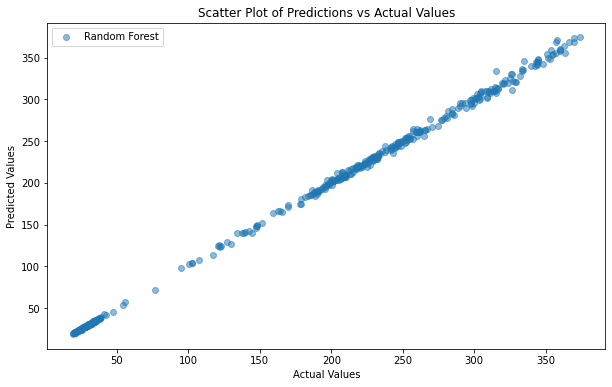

In [2]:
# Select features (X) and target variable (y)
features = ['Open', 'High', 'Low', 'Volume']  
target = 'Close'
X = stock_data[features]
y = stock_data[target]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs Actual Values')
plt.legend()
plt.show()

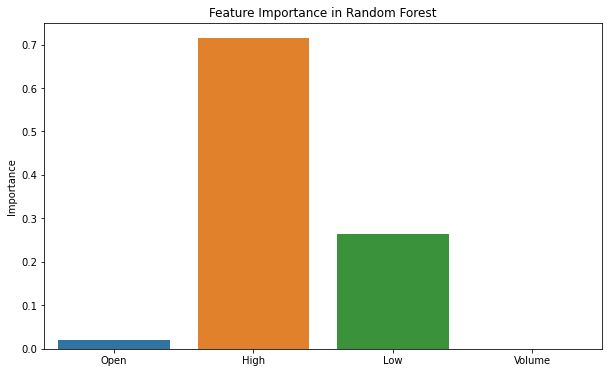

In [3]:
# Feature Importance
feature_importance = rf_model.feature_importances_
# Feature Importance Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importance)
plt.title('Feature Importance in Random Forest')
plt.ylabel('Importance')
plt.show()

Text(0.5, 1.0, 'Random Forest Residuals')

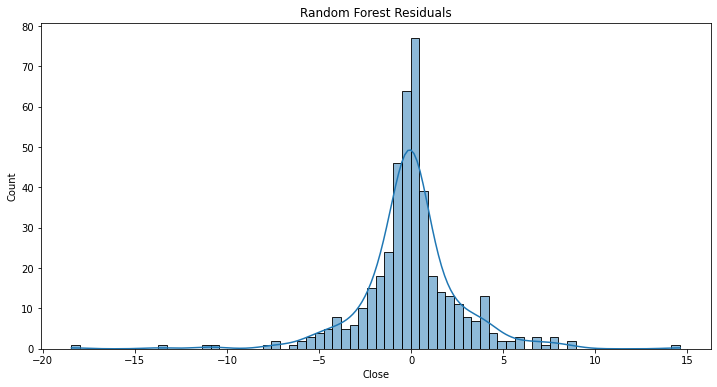

In [4]:
rf_residuals = y_test - rf_predictions
# Residuals Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
sns.histplot(rf_residuals, kde=True)
plt.title('Random Forest Residuals')

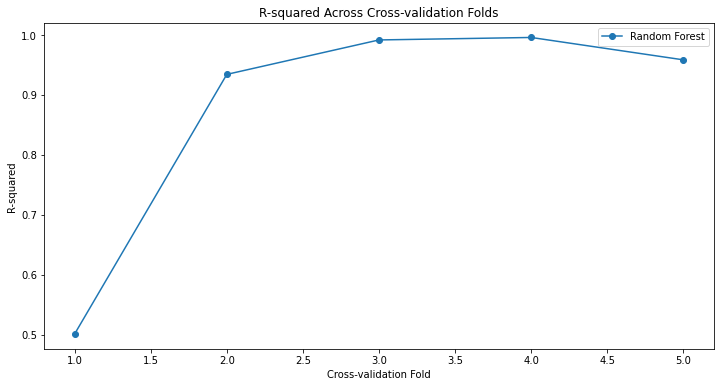

In [5]:
cv_r2_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), cv_r2_rf, marker='o', label='Random Forest')
plt.xlabel('Cross-validation Fold')
plt.ylabel('R-squared')
plt.title('R-squared Across Cross-validation Folds')
plt.legend()
plt.show()

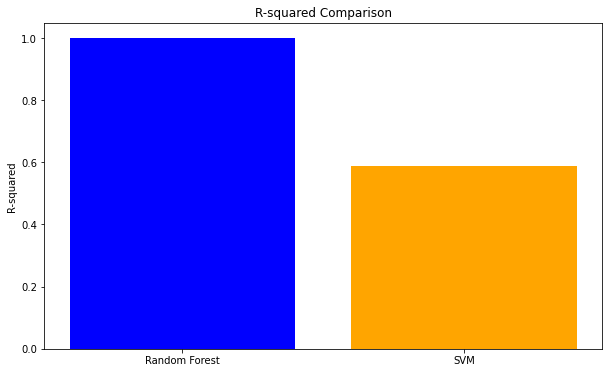

In [6]:
# Support Vector Machine Regressor
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
# Evaluate SVM model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
# Accuracy Comparison Bar Graph
labels = ['Random Forest', 'SVM']
accuracy_values = [rf_r2, svm_r2]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracy_values, color=['blue', 'orange'])
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.show()

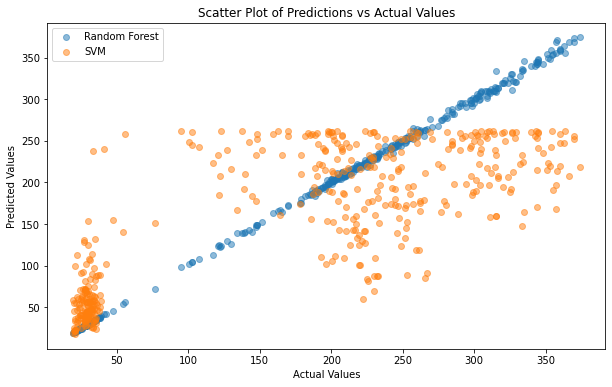

In [7]:
# Scatter Plot of Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.5)
plt.scatter(y_test, svm_predictions, label='SVM', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs Actual Values')
plt.legend()
plt.show()

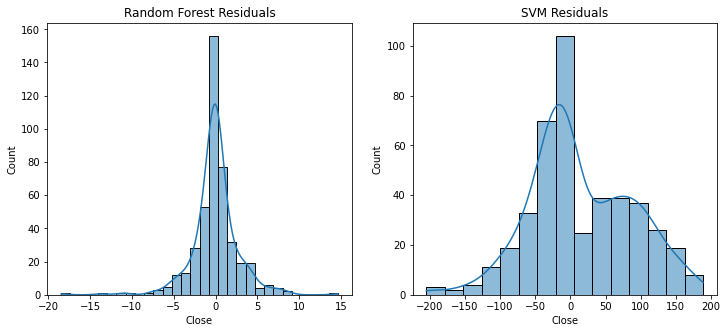

In [8]:
svm_residuals = y_test - svm_predictions
# Residuals Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(rf_residuals, kde=True, bins=30) 
plt.title('Random Forest Residuals')

plt.subplot(1, 2, 2)
sns.histplot(svm_residuals, kde=True)
plt.title('SVM Residuals')

plt.show()